# 1- Import Libraries 

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 2- Reading Data

In [14]:
df=pd.read_csv('Salary Data.csv')

In [15]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# 3- EDA

In [28]:
df['Gender'].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

(array([ 6., 29., 59., 53., 54., 40., 35., 48., 32., 17.]),
 array([23., 26., 29., 32., 35., 38., 41., 44., 47., 50., 53.]),
 <BarContainer object of 10 artists>)

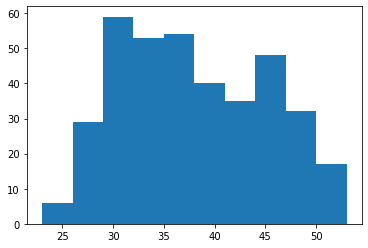

In [29]:
plt.hist(df['Age'])

<AxesSubplot:>

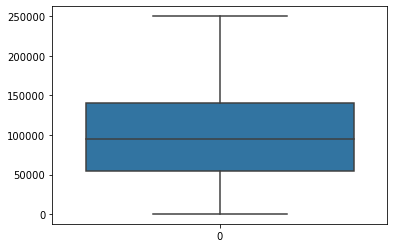

In [30]:
sns.boxplot(data=df['Salary'])

# 4-Preprocessing

In [31]:
df=df.dropna()

In [32]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [33]:
for j in df.select_dtypes(exclude='object').columns:
    df[j]=df[j].astype('int64')

C:\Users\M\AppData\Local\Temp\ipykernel_13436\3377626757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j]=df[j].astype('int64')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  373 non-null    int64 
 1   Gender               373 non-null    object
 2   Education Level      373 non-null    object
 3   Job Title            373 non-null    object
 4   Years of Experience  373 non-null    int64 
 5   Salary               373 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.4+ KB


In [35]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [36]:
df=df.drop(columns='Job Title')

In [37]:
df

,Age,Gender,Education Level,Years of Experience,Salary
0,32,Male,Bachelor's,5,90000
1,28,Female,Master's,3,65000
2,45,Male,PhD,15,150000
3,36,Female,Bachelor's,7,60000
4,52,Male,Master's,20,200000
...,...,...,...,...,...
370,35,Female,Bachelor's,8,85000
371,43,Male,Master's,19,170000
372,29,Female,Bachelor's,2,40000
373,34,Male,Bachelor's,7,90000


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Education Level"] = le.fit_transform(df["Education Level"])

In [41]:
df

,Age,Gender,Education Level,Years of Experience,Salary
0,32,Male,0,5,90000
1,28,Female,1,3,65000
2,45,Male,2,15,150000
3,36,Female,0,7,60000
4,52,Male,1,20,200000
...,...,...,...,...,...
370,35,Female,0,8,85000
371,43,Male,1,19,170000
372,29,Female,0,2,40000
373,34,Male,0,7,90000


In [42]:
df['Education Level'].unique()

array([0, 1, 2])

In [48]:
x=df.drop(columns={'Salary','Gender'})

In [49]:
y=df['Salary']

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler= StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model=LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_predict=model.predict(X_test)

In [61]:
model.score(y_test,y_predict)

ValueError: Expected 2D array, got 1D array instead:
array=[ 40000  40000  50000 140000  85000 140000  60000 115000  40000 190000
  70000 130000 150000 105000 120000  60000  45000  40000 150000 180000
  90000  95000 120000  40000 170000  40000  45000  50000 120000  65000
  70000 100000 100000 120000  45000 130000  75000 110000  90000  60000
 120000 150000 125000 180000 170000  55000  55000 105000  80000  90000
 120000  95000 100000  95000  80000 180000  90000  40000  40000  50000
  45000 160000 150000  40000  35000  95000  95000 170000  50000 150000
  65000  45000 110000  35000 180000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [63]:
y_test.shape

(75,)